In [2]:
%matplotlib inline

In [3]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

### 9.1 모형 결합(model combining)

#### 다수결 방법
- ensemble 서브패키지 : 다수결 방법을 위한 VotingClassifier 클래스를 제공
    - estimators: 개별 모형 목록, 리스트나 named parameter 형식으로 입력
    - voting: 문자열 {hard, soft} hard voting 과 soft voting 선택. 디폴트는 hard
    - weights: 사용자 가중치 리스트

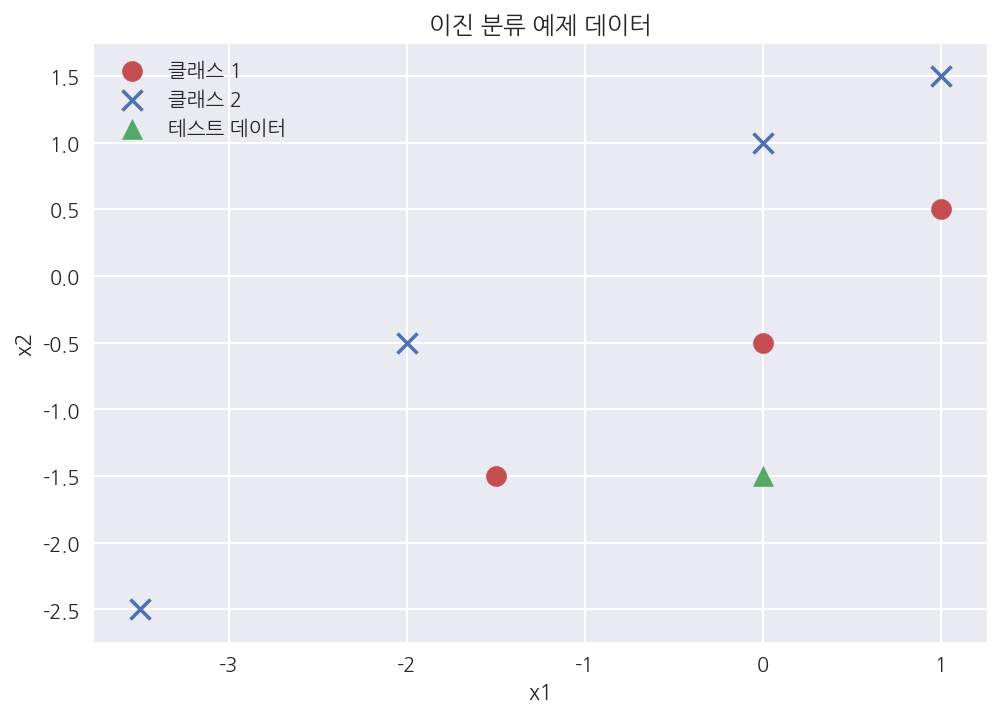

In [4]:
X = np.array([[0, -0.5], [-1.5, -1.5], [1, 0.5], [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])
x_new = [0, -1.5]
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, marker='o', c='r', label="클래스 1")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, marker='x', c='b', label="클래스 2")
plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g', label="테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("이진 분류 예제 데이터")
plt.legend()
plt.show()